In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.cluster import KMeans

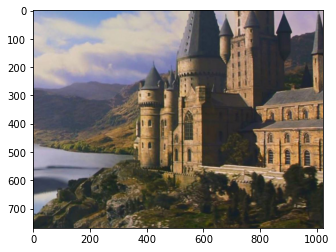

In [57]:
img = cv.imread('hogwarts.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [58]:
pixels = img.reshape((-1, 3))
print(pixels.shape)

(786432, 3)


In [65]:
dominant_colors = 8
km = KMeans(n_clusters = dominant_colors)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
centers = km.cluster_centers_
centers = np.array(centers, dtype = 'uint8')

ValueError: num must be 1 <= num <= 4, not 5

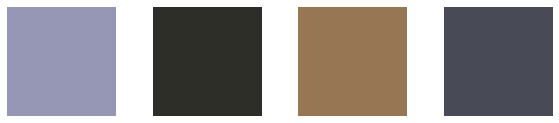

In [71]:
i = 1
plt.figure(0, figsize = (10, 2))
colors = []
for c in centers:
    plt.subplot(1, 4, i)
    plt.axis("off")
    i += 1
    colors.append(c)
    a = np.zeros((100, 100, 3), dtype = 'uint8')
    a[:, :, :] = c
    plt.imshow(a)

In [72]:
print(colors)
new_img = np.zeros(pixels.shape, dtype = 'uint8')
print(new_img.shape)

[array([149, 151, 181], dtype=uint8), array([46, 46, 40], dtype=uint8), array([151, 119,  83], dtype=uint8), array([72, 74, 85], dtype=uint8)]
(786432, 3)


In [73]:
for ix in range (new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]


IndexError: list index out of range

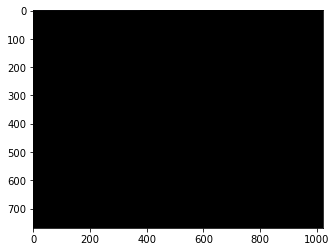

In [74]:
new_img = new_img.reshape((img.shape))
plt.imshow(new_img)